In [1]:
# Importing required libraries

import numpy as np
import pandas as pd

In [2]:
# Importing the Data

df = pd.read_csv('C:/Users/Hem Kumar Reddy/Desktop/EV_available_Data.csv')

In [3]:
# The number of rows and Columns in the Data

df.shape

(15591, 6)

In [4]:
df.head()

,Data Year,County,FUEL_TYPE,MAKE,MODEL,Number of Vehicles
0,1998,Los Angeles,Electric,Ford,Ranger,1
1,1998,Orange,Electric,Ford,Ranger,1
2,1998,San Bernardino,Electric,Ford,Ranger,2
3,1998,San Mateo,Electric,Ford,Ranger,1
4,1999,Santa Barbara,Electric,Ford,Ranger,1


In [5]:
df.nunique()

Data Year              23
County                 59
FUEL_TYPE               3
MAKE                   39
MODEL                 141
Number of Vehicles    888
dtype: int64

In [6]:
# To find, whether we have any missing values (null values) in the data 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15591 entries, 0 to 15590
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data Year           15591 non-null  int64 
 1   County              15591 non-null  object
 2   FUEL_TYPE           15591 non-null  object
 3   MAKE                15591 non-null  object
 4   MODEL               15591 non-null  object
 5   Number of Vehicles  15591 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 731.0+ KB


In [7]:
# Finding out, whether do we have any missing value

df.isnull().sum()

Data Year             0
County                0
FUEL_TYPE             0
MAKE                  0
MODEL                 0
Number of Vehicles    0
dtype: int64

In [8]:
# We don't have any missing values in the Data

In [9]:
## We have divided our problem into two parts
## Business Use -case (Part - 1) :- To forecast / Predict EV sales in California
## Part - 2 :- To Predict / Forecast EV Charging Points in California

# Business Understanding
# Data Understanding
# Data Cleaning
# Modeling
# Evaluation
# Deployment

In [10]:
## Business Understaning

In [11]:
'''Data Understanding :-

 a) Data Year - This specifies the years between 1998 to 2022, Totally we have 23 years data
 b) County - We collected 59 counties data in California state
 c) FUEL_TYPE - There are three fuel types such as 'Electric' 'Hydrogen' 'PHEV'
 d) MAKE - This data point tells about the name of the manufacturer
 e) Number of Vehicles - Number of Vehicles in that particular year and respective county'''

"Data Understanding :-\n\n a) Data Year - This specifies the years between 1998 to 2022, Totally we have 23 years data\n b) County - We collected 59 counties data in California state\n c) FUEL_TYPE - There are three fuel types such as 'Electric' 'Hydrogen' 'PHEV'\n d) MAKE - This data point tells about the name of the manufacturer\n e) Number of Vehicles - Number of Vehicles in that particular year and respective county"

In [12]:
df.nunique()

Data Year              23
County                 59
FUEL_TYPE               3
MAKE                   39
MODEL                 141
Number of Vehicles    888
dtype: int64

In [13]:
# Distinct counties present in the Data

print(pd.unique(df['County']))

['Los Angeles' 'Orange' 'San Bernardino' 'San Mateo' 'Santa Barbara'
 'Out Of State' 'Tulare' 'Ventura' 'Placer' 'Napa' 'Sacramento' 'Alameda'
 'Contra Costa' 'Humboldt' 'Kern' 'Marin' 'San Diego' 'San Francisco'
 'San Luis Obispo' 'Santa Clara' 'Sonoma' 'Stanislaus' 'Yolo' 'Amador'
 'Fresno' 'Lake' 'Monterey' 'Riverside' 'San Benito' 'San Joaquin'
 'Santa Cruz' 'Butte' 'Calaveras' 'Del Norte' 'El Dorado' 'Imperial'
 'Kings' 'Lassen' 'Madera' 'Mariposa' 'Mendocino' 'Merced' 'Nevada'
 'Shasta' 'Solano' 'Tehama' 'Trinity' 'Tuolumne' 'Yuba' 'Inyo' 'Plumas'
 'Siskiyou' 'Sutter' 'Alpine' 'Glenn' 'Mono' 'Colusa' 'Modoc' 'Sierra']


** Totally, we are having 59 counties. As the scope of the project is limited to California state, we should not consider out of state EV's.Here, 'Out of state EV's' refers to the EV's which are purchased out of California state but are being used in California.

In Data Cleaning, I will remove "out of state EV's"

In [14]:
# Distinct Fuel_Type present in the Data

print(pd.unique(df['FUEL_TYPE']))

['Electric' 'Hydrogen' 'PHEV']


** We are mainly focusing on the EV and PHEV.

So, In Data Cleaning, we have to drop "Hydrogen" Fuel type Vehicles

In [15]:
# Distinct Make present in the Data

print(pd.unique(df['MAKE']))

['Ford' 'Tesla' 'MINI' 'Honda' 'Chevrolet' 'Toyota' 'Nissan' 'Smart'
 'Mitsubishi' 'BMW' 'Fisker' 'Scion' 'FIAT' 'Porsche' 'Kia'
 'Mercedes-Benz' 'Volkswagen' 'Cadillac' 'McLaren' 'Hyundai' 'Volvo'
 'Audi' 'Chrysler' 'Karma' 'Jaguar' 'Land Rover' 'Subaru' 'Lincoln'
 'Polestar' 'Bentley' 'Lucid' 'Mazda' 'Rivian' 'Ferrari' 'Jeep' 'Genesis'
 'GMC' 'Toyota/Subaru' 'Lexus']


** To properly understand the data. Name of this column should be changed to Manufacturer

In [16]:
# The names of the Columns

df.columns

Index(['Data Year', 'County', 'FUEL_TYPE', 'MAKE', 'MODEL',
       'Number of Vehicles'],
      dtype='object')

In [17]:
# In time-series Data, It makes more sense to index the data based on year

# df = df.set_index(['Data Year'], drop=True)

In [18]:
# In Data Cleaning, Changing the names of the Columns into more understandable such as Make into Manufacturer 

df = df.rename(columns={"Data Year" : "Data Year", "County" : "County", "FUEL_TYPE" : "FUEL_TYPE", "MAKE": "Manufacturer", "MODEL" : "MODEL","Number of Vehicles" : "Number of Vehicles"})

df.head()

,Data Year,County,FUEL_TYPE,Manufacturer,MODEL,Number of Vehicles
0,1998,Los Angeles,Electric,Ford,Ranger,1
1,1998,Orange,Electric,Ford,Ranger,1
2,1998,San Bernardino,Electric,Ford,Ranger,2
3,1998,San Mateo,Electric,Ford,Ranger,1
4,1999,Santa Barbara,Electric,Ford,Ranger,1


In [19]:
# Selecting only few Columns such as 

df = df[['County', 'FUEL_TYPE', 'Manufacturer','Number of Vehicles']]

print(df)

               County FUEL_TYPE Manufacturer  Number of Vehicles
0         Los Angeles  Electric         Ford                   1
1              Orange  Electric         Ford                   1
2      San Bernardino  Electric         Ford                   2
3           San Mateo  Electric         Ford                   1
4       Santa Barbara  Electric         Ford                   1
...               ...       ...          ...                 ...
15586            Yuba      PHEV          Kia                   4
15587            Yuba      PHEV       Toyota                  10
15588            Yuba      PHEV       Toyota                   6
15589            Yuba      PHEV        Volvo                   1
15590            Yuba  Hydrogen       Toyota                   2

[15591 rows x 4 columns]


In [20]:
df.nunique()

County                 59
FUEL_TYPE               3
Manufacturer           39
Number of Vehicles    888
dtype: int64

In [21]:
## We don't need Hydrogen in FUEL_TYPE

df = df[(df['FUEL_TYPE'] != 'Hydrogen')]

print(df.nunique())

County                 59
FUEL_TYPE               2
Manufacturer           39
Number of Vehicles    883
dtype: int64


In [22]:
# Now, we need to remove Datapoints with 'Out Of State'
# As our analysis is concerned to only Carlifornia state

df1 = df[(df['County'] != 'Out Of State')]

In [23]:
df1.nunique()

County                 58
FUEL_TYPE               2
Manufacturer           39
Number of Vehicles    880
dtype: int64

In [24]:
df2 = df1[['County','Number of Vehicles']]

df2.head(10)

,County,Number of Vehicles
0,Los Angeles,1
1,Orange,1
2,San Bernardino,2
3,San Mateo,1
4,Santa Barbara,1
6,Los Angeles,1
7,Tulare,1
8,Ventura,2
9,Placer,2
10,Santa Barbara,1


In [25]:
# I want this list in descending / top 10

In [26]:
# Group by Data Year, County

df2 = df.groupby("County")["Number of Vehicles"].sum()
df2.head(40)

County
Alameda            95977
Alpine                31
Amador               342
Butte               1670
Calaveras            474
Colusa                75
Contra Costa       52847
Del Norte             95
El Dorado           5201
Fresno             12231
Glenn                118
Humboldt            1562
Imperial             771
Inyo                 155
Kern                7345
Kings                825
Lake                 485
Lassen                39
Los Angeles       372552
Madera              1166
Marin              20032
Mariposa             153
Mendocino           1215
Merced              1756
Modoc                  6
Mono                 138
Monterey            6531
Napa                4668
Nevada              1800
Orange            172404
Out Of State       12976
Placer             12813
Plumas               103
Riverside          49925
Sacramento         31051
San Benito          1389
San Bernardino     39068
San Diego         111806
San Francisco      36228
San Joaquin       

In [27]:
Data_Year = [1998,1999,2000,2001,2002,2003,2004,2005,2006, 2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
Number_of_Vehicles = [5,1,0,1,3,6,1,8,1,0,0,83,639,6609,17683,39415,58392,63880,71504,90610,152465,144213,142793,244149,339946]

df3 = pd.DataFrame(Number_of_Vehicles,Data_Year)

print(df3)

           0
1998       5
1999       1
2000       0
2001       1
2002       3
2003       6
2004       1
2005       8
2006       1
2007       0
2008       0
2009      83
2010     639
2011    6609
2012   17683
2013   39415
2014   58392
2015   63880
2016   71504
2017   90610
2018  152465
2019  144213
2020  142793
2021  244149
2022  339946


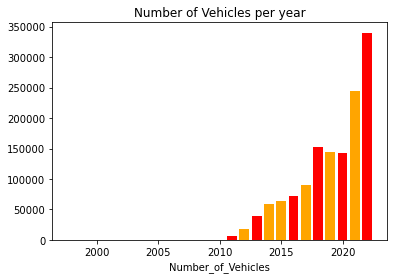

In [28]:
import matplotlib.pyplot as plt

Data_Year = [1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
Number_of_Vehicles = [5,1,0,1,3,6,1,8,1,0,0,83,639,6609,17683,39415,58392,63880,71504,90610,152465,144213,142793,244149,339946]
c = ["orange","red","orange","red","orange","red","orange","red","orange","red","orange","red","orange","red","orange","red","orange"]

plt.bar(Data_Year,Number_of_Vehicles, width = 0.8, color = c)
plt.xlabel("Data_Year")
plt.xlabel("Number_of_Vehicles")

plt.title("Number of Vehicles per year")

plt.show()

In [29]:
## Visualization - 2 :- Highest sales which company made (Pie Chart with Percentages)

# Data should be Manufacturer, Sales


In [30]:
df6 = df1[["Manufacturer","Number of Vehicles"]]

df6.head(10)

,Manufacturer,Number of Vehicles
0,Ford,1
1,Ford,1
2,Ford,2
3,Ford,1
4,Ford,1
6,Ford,1
7,Ford,1
8,Ford,2
9,Ford,2
10,Ford,1


In [31]:
df6.sort_values(['Manufacturer', 'Number of Vehicles'], ascending=False).groupby('Manufacturer').head(10)

,Manufacturer,Number of Vehicles
10675,Volvo,1137
13301,Volvo,1027
13299,Volvo,534
11089,Volvo,448
11548,Volvo,403
...,...,...
2915,Audi,731
5422,Audi,666
8659,Audi,509
13749,Audi,470


In [32]:
# Group by Data Year, County

df7 = df6.groupby("Manufacturer")["Number of Vehicles"].sum()
df7.head(40)

Manufacturer
Audi              22318
BMW               91272
Bentley              73
Cadillac            692
Chevrolet        150302
Chrysler          12304
FIAT              29783
Ferrari             131
Fisker              369
Ford              70411
GMC                 109
Genesis             904
Honda             26549
Hyundai           28724
Jaguar             1984
Jeep              11776
Karma               116
Kia               25633
Land Rover          923
Lexus              1884
Lincoln            1097
Lucid               666
MINI               3314
Mazda               449
McLaren              27
Mercedes-Benz     14021
Mitsubishi         2857
Nissan            60941
Polestar           4266
Porsche            9789
Rivian             4435
Scion                92
Smart              5044
Subaru             4732
Tesla            630211
Toyota           108728
Toyota/Subaru       436
Volkswagen        25662
Volvo             19383
Name: Number of Vehicles, dtype: int64

In [33]:
df7.describe()

count        39.000000
mean      35189.923077
std      103312.388396
min          27.000000
25%         679.000000
50%        4435.000000
75%       25647.500000
max      630211.000000
Name: Number of Vehicles, dtype: float64

In [34]:
print(sum(df7))

1372407


In [35]:
df8 = df7.sort_values()

print(df8[-10:])

Manufacturer
Volkswagen     25662
Honda          26549
Hyundai        28724
FIAT           29783
Nissan         60941
Ford           70411
BMW            91272
Toyota        108728
Chevrolet     150302
Tesla         630211
Name: Number of Vehicles, dtype: int64


In [36]:
df9 = (df8/1372407)*100

print(df9)

Manufacturer
McLaren           0.001967
Bentley           0.005319
Scion             0.006704
GMC               0.007942
Karma             0.008452
Ferrari           0.009545
Fisker            0.026887
Toyota/Subaru     0.031769
Mazda             0.032716
Lucid             0.048528
Cadillac          0.050422
Genesis           0.065870
Land Rover        0.067254
Lincoln           0.079933
Lexus             0.137277
Jaguar            0.144564
Mitsubishi        0.208174
MINI              0.241474
Polestar          0.310841
Rivian            0.323155
Subaru            0.344796
Smart             0.367529
Porsche           0.713272
Jeep              0.858054
Chrysler          0.896527
Mercedes-Benz     1.021636
Volvo             1.412336
Audi              1.626194
Kia               1.867740
Volkswagen        1.869853
Honda             1.934484
Hyundai           2.092965
FIAT              2.170129
Nissan            4.440447
Ford              5.130475
BMW               6.650505
Toyota         

In [37]:
df10 = print(df9[-10:])

Manufacturer
Volkswagen     1.869853
Honda          1.934484
Hyundai        2.092965
FIAT           2.170129
Nissan         4.440447
Ford           5.130475
BMW            6.650505
Toyota         7.922431
Chevrolet     10.951707
Tesla         45.920124
Name: Number of Vehicles, dtype: float64


In [38]:
print(sum(df9[-10:]))

89.08312184359303


In [39]:
print(100-(89.08312184359303))

10.916878156406966


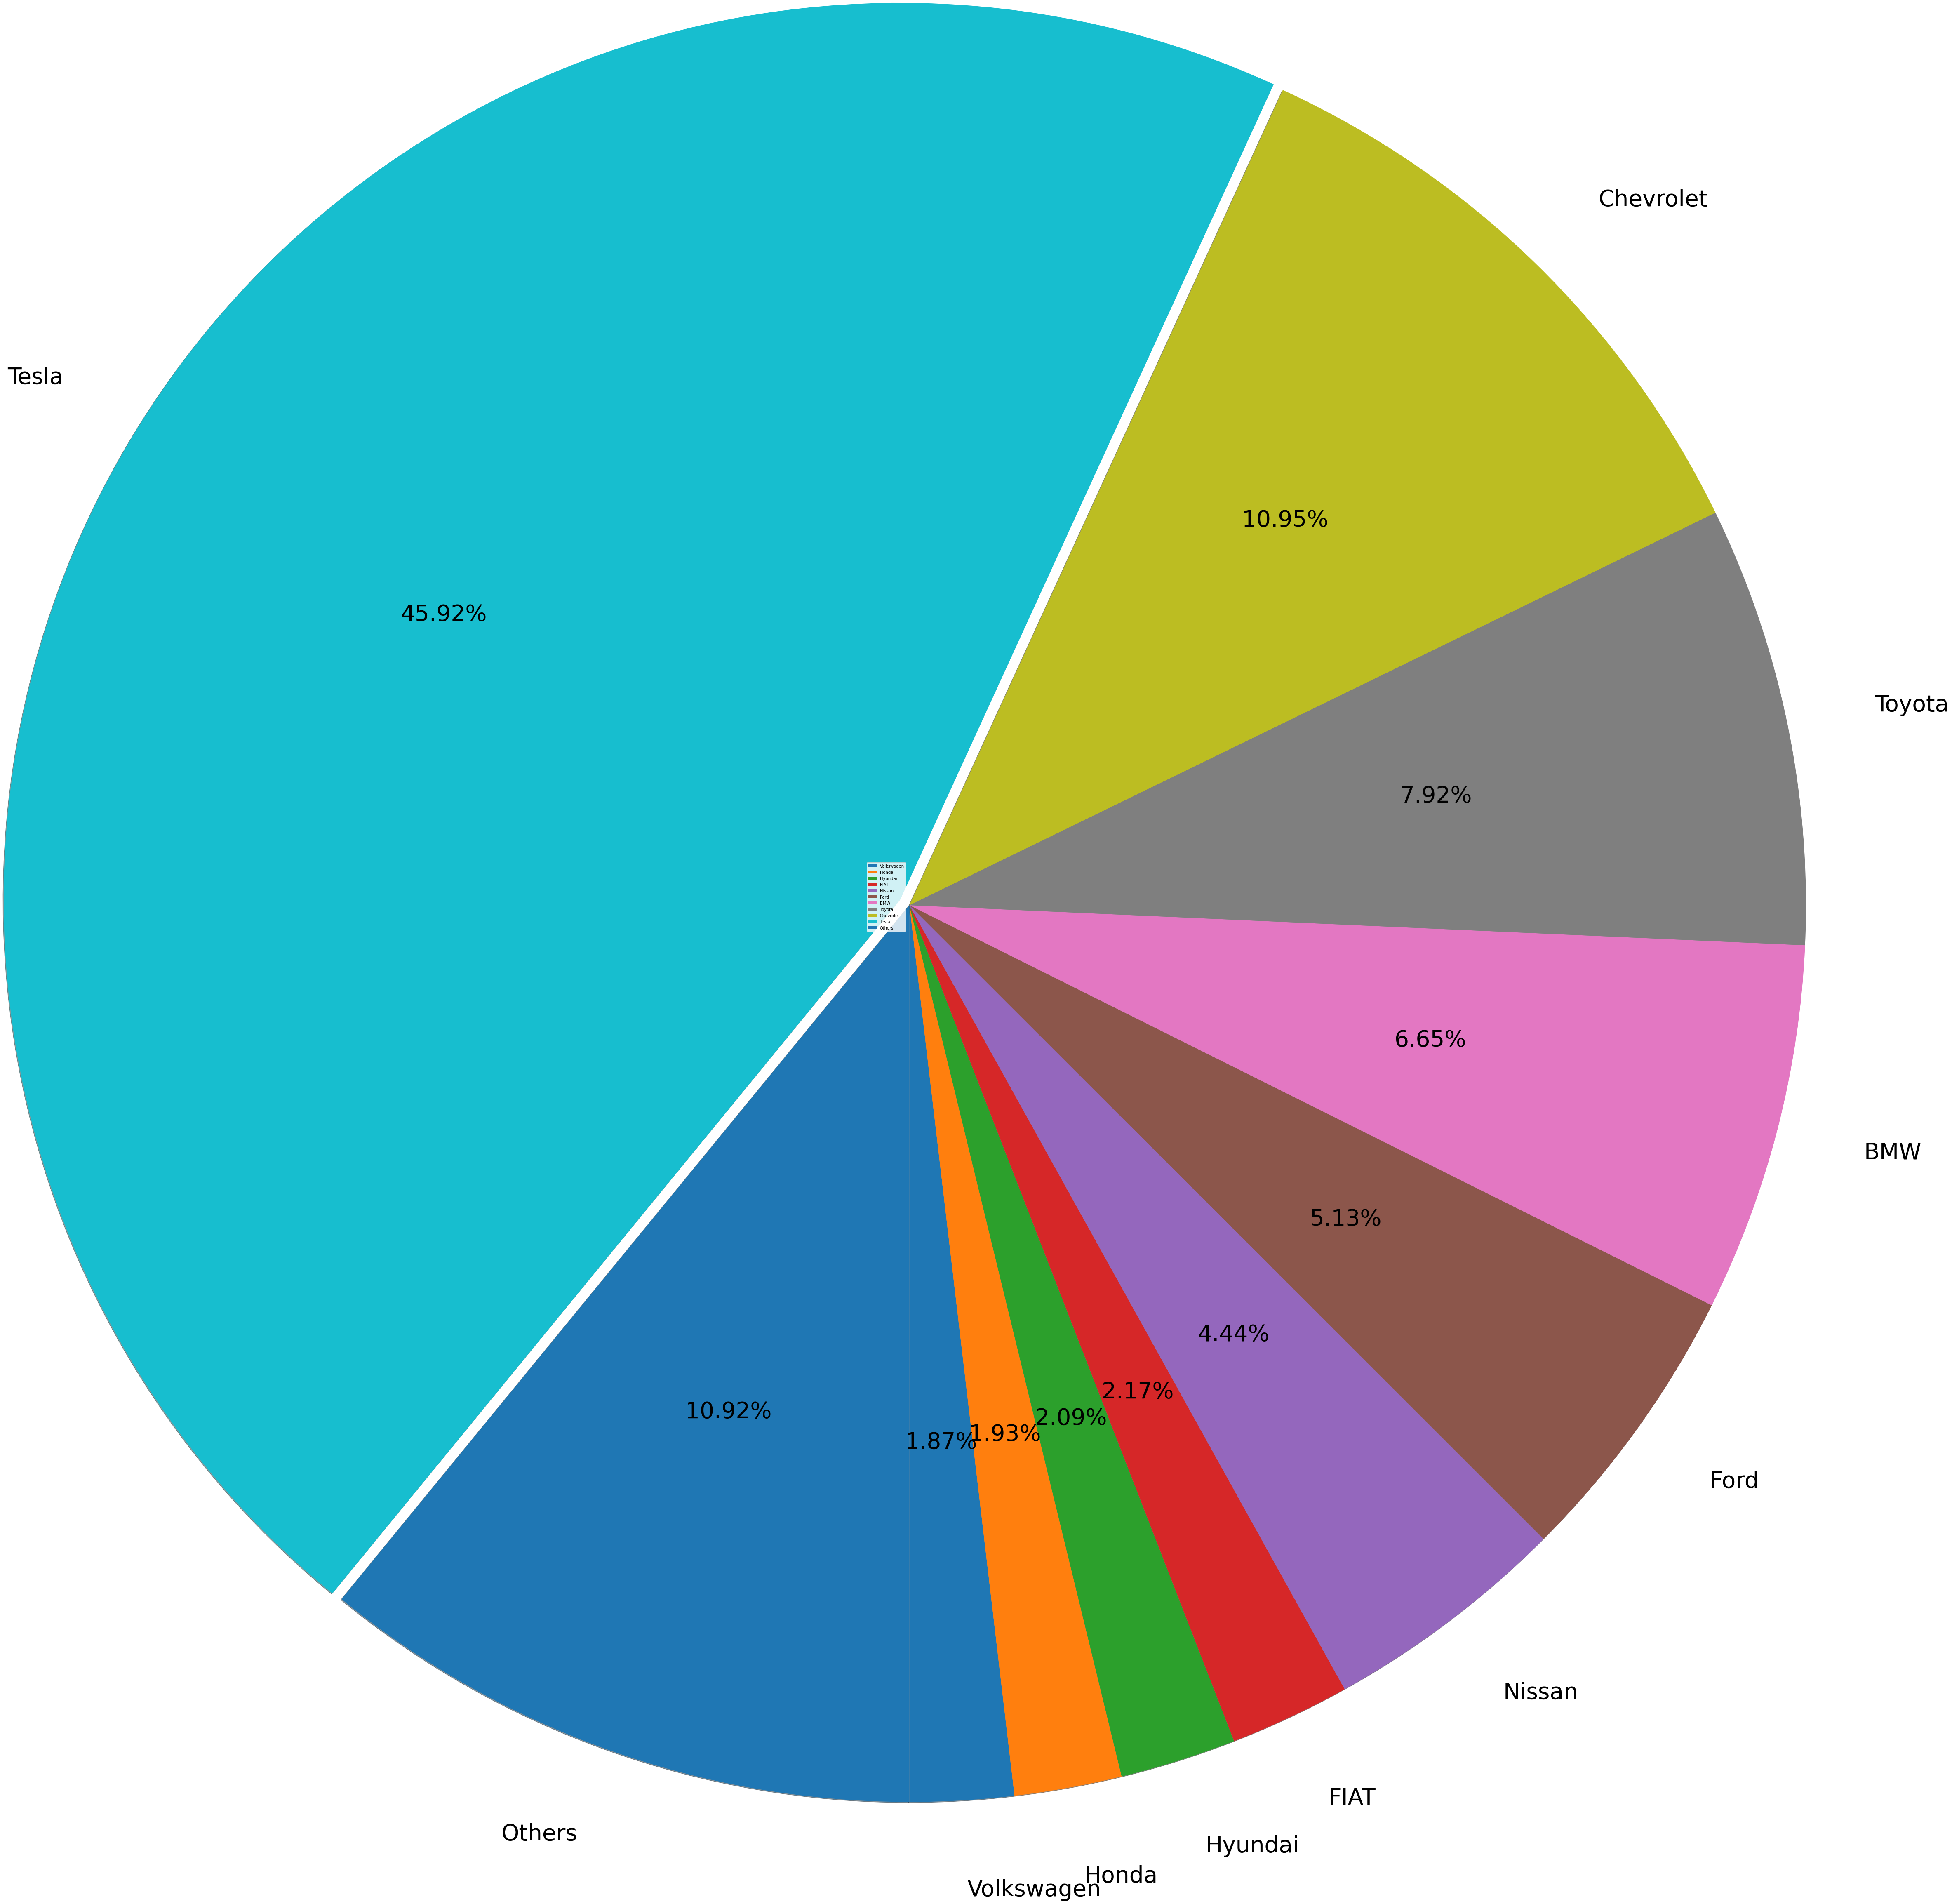

In [40]:
y = np.array([1.869853, 1.934484, 2.092965, 2.170129, 4.440447, 5.130475, 6.650505, 7.922431, 10.951707, 45.920124,10.916878])

mylabels = ["Volkswagen","Honda", "Hyundai", "FIAT", "Nissan", "Ford", "BMW", "Toyota","Chevrolet","Tesla","Others"]
explode = [0,0,0,0,0,0,0,0,0,0.3,0]
textprops = {"fontsize":55}

plt.pie(y, labels = mylabels, autopct = "%0.2f%%",explode = explode ,radius = 25,startangle = 270, shadow = True, textprops = textprops)

plt.legend()
plt.show() 

In [41]:
## Tesla has highest sales i.e around 46%

In [42]:
# Visualizatio - 3 :- Overall sales, each county wise - on Map

# We need County and number of Vehicles
# Geo-spatial Map

df10 = df1[["County","Number of Vehicles"]]

df10.head(10)

,County,Number of Vehicles
0,Los Angeles,1
1,Orange,1
2,San Bernardino,2
3,San Mateo,1
4,Santa Barbara,1
6,Los Angeles,1
7,Tulare,1
8,Ventura,2
9,Placer,2
10,Santa Barbara,1


In [43]:
# let us create a group by 

# Group by County,Number of Vehicles

df11 = df10.groupby("County")["Number of Vehicles"].sum()
df11.head(40)

County
Alameda             95977
Alpine                 31
Amador                342
Butte                1670
Calaveras             474
Colusa                 75
Contra Costa        52847
Del Norte              95
El Dorado            5201
Fresno              12231
Glenn                 118
Humboldt             1562
Imperial              771
Inyo                  155
Kern                 7345
Kings                 825
Lake                  485
Lassen                 39
Los Angeles        372552
Madera               1166
Marin               20032
Mariposa              153
Mendocino            1215
Merced               1756
Modoc                   6
Mono                  138
Monterey             6531
Napa                 4668
Nevada               1800
Orange             172404
Placer              12813
Plumas                103
Riverside           49925
Sacramento          31051
San Benito           1389
San Bernardino      39068
San Diego          111806
San Francisco       36228
San J

In [44]:
df12 = df11.sort_values()

print(df12)

County
Modoc                   6
Sierra                 11
Alpine                 31
Lassen                 39
Trinity                50
Colusa                 75
Del Norte              95
Plumas                103
Glenn                 118
Mono                  138
Mariposa              153
Inyo                  155
Siskiyou              181
Tehama                254
Amador                342
Tuolumne              426
Calaveras             474
Lake                  485
Yuba                  582
Imperial              771
Kings                 825
Sutter                840
Madera               1166
Mendocino            1215
San Benito           1389
Shasta               1421
Humboldt             1562
Butte                1670
Merced               1756
Nevada               1800
Tulare               2684
Napa                 4668
Stanislaus           5122
El Dorado            5201
Yolo                 5240
Monterey             6531
San Luis Obispo      6581
Kern                 7345
Santa

In [45]:
df12.nunique()

58

In [46]:
# We need to do in Tableau , This geospatial map

In [47]:
# Goal:- Forecastting sales next 3 years

# which the best method

In [48]:
print(df3)

           0
1998       5
1999       1
2000       0
2001       1
2002       3
2003       6
2004       1
2005       8
2006       1
2007       0
2008       0
2009      83
2010     639
2011    6609
2012   17683
2013   39415
2014   58392
2015   63880
2016   71504
2017   90610
2018  152465
2019  144213
2020  142793
2021  244149
2022  339946


In [60]:
Data_Year = [1998,1999,2000,2001,2002,2003,2004,2005,2006, 2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]
Number_of_Vehicles = [5,1,0,1,3,6,1,8,1,0,0,83,639,6609,17683,39415,58392,63880,71504,90610,152465,144213,142793,244149,339946]

df3 = pd.DataFrame(list(zip(Data_Year, Number_of_Vehicles)))

print(df3)

       0       1
0   1998       5
1   1999       1
2   2000       0
3   2001       1
4   2002       3
5   2003       6
6   2004       1
7   2005       8
8   2006       1
9   2007       0
10  2008       0
11  2009      83
12  2010     639
13  2011    6609
14  2012   17683
15  2013   39415
16  2014   58392
17  2015   63880
18  2016   71504
19  2017   90610
20  2018  152465
21  2019  144213
22  2020  142793
23  2021  244149
24  2022  339946


In [62]:
# adding column name to the respective columns
df3.columns =['Year', 'Number_of_Vehicles']
  
# displaying the DataFrame
print(df3)

    Year  Number_of_Vehicles
0   1998                   5
1   1999                   1
2   2000                   0
3   2001                   1
4   2002                   3
5   2003                   6
6   2004                   1
7   2005                   8
8   2006                   1
9   2007                   0
10  2008                   0
11  2009                  83
12  2010                 639
13  2011                6609
14  2012               17683
15  2013               39415
16  2014               58392
17  2015               63880
18  2016               71504
19  2017               90610
20  2018              152465
21  2019              144213
22  2020              142793
23  2021              244149
24  2022              339946


In [1]:
# Now, I need to work on Moving Average
# Program to calculate moving average using numpy
  
import numpy as np

arr = [5,1,0,1,3,6,1,8,1,0,0,83,639,6609,17683,39415,58392,63880,71504,90610,152465,144213,142793,244149,339946]
window_size = 3
  
i = 0
# Initialize an empty list to store moving averages
moving_averages = []
  
# Loop through the array t o
#consider every window of size 3
while i < len(arr) - window_size + 1:
  
    # Calculate the average of current window
    window_average = round(np.sum(arr[
      i:i+window_size]) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    moving_averages.append(window_average)
      
    # Shift window to right by one position
    i += 1
  
print(moving_averages)

[2.0, 0.67, 1.33, 3.33, 3.33, 5.0, 3.33, 3.0, 0.33, 27.67, 240.67, 2443.67, 8310.33, 21235.67, 38496.67, 53895.67, 64592.0, 75331.33, 104859.67, 129096.0, 146490.33, 177051.67, 242296.0]


In [55]:
# Create Visualization in Tableau 

# use Geo-spatial map

In [56]:
# Data should be based on year and county

In [57]:
# Now, we need to create Visualizations 

# EDA 3 Charts


## In EDA, we need to do 2-3 Visualizations